In [27]:
from keras.models import load_model
from keras.utils.generic_utils import CustomObjectScope
from keras.applications.mobilenet import relu6, DepthwiseConv2D
import boto3
import mritopng
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import cv2
from PIL import Image
import os, shutil

loaded image
applied CLAHE to image
directory structure made
images cut up
model loaded
Found 378 images belonging to 1 classes.
38/38 [==============================] - 31s 814ms/step
made predictions
final image made


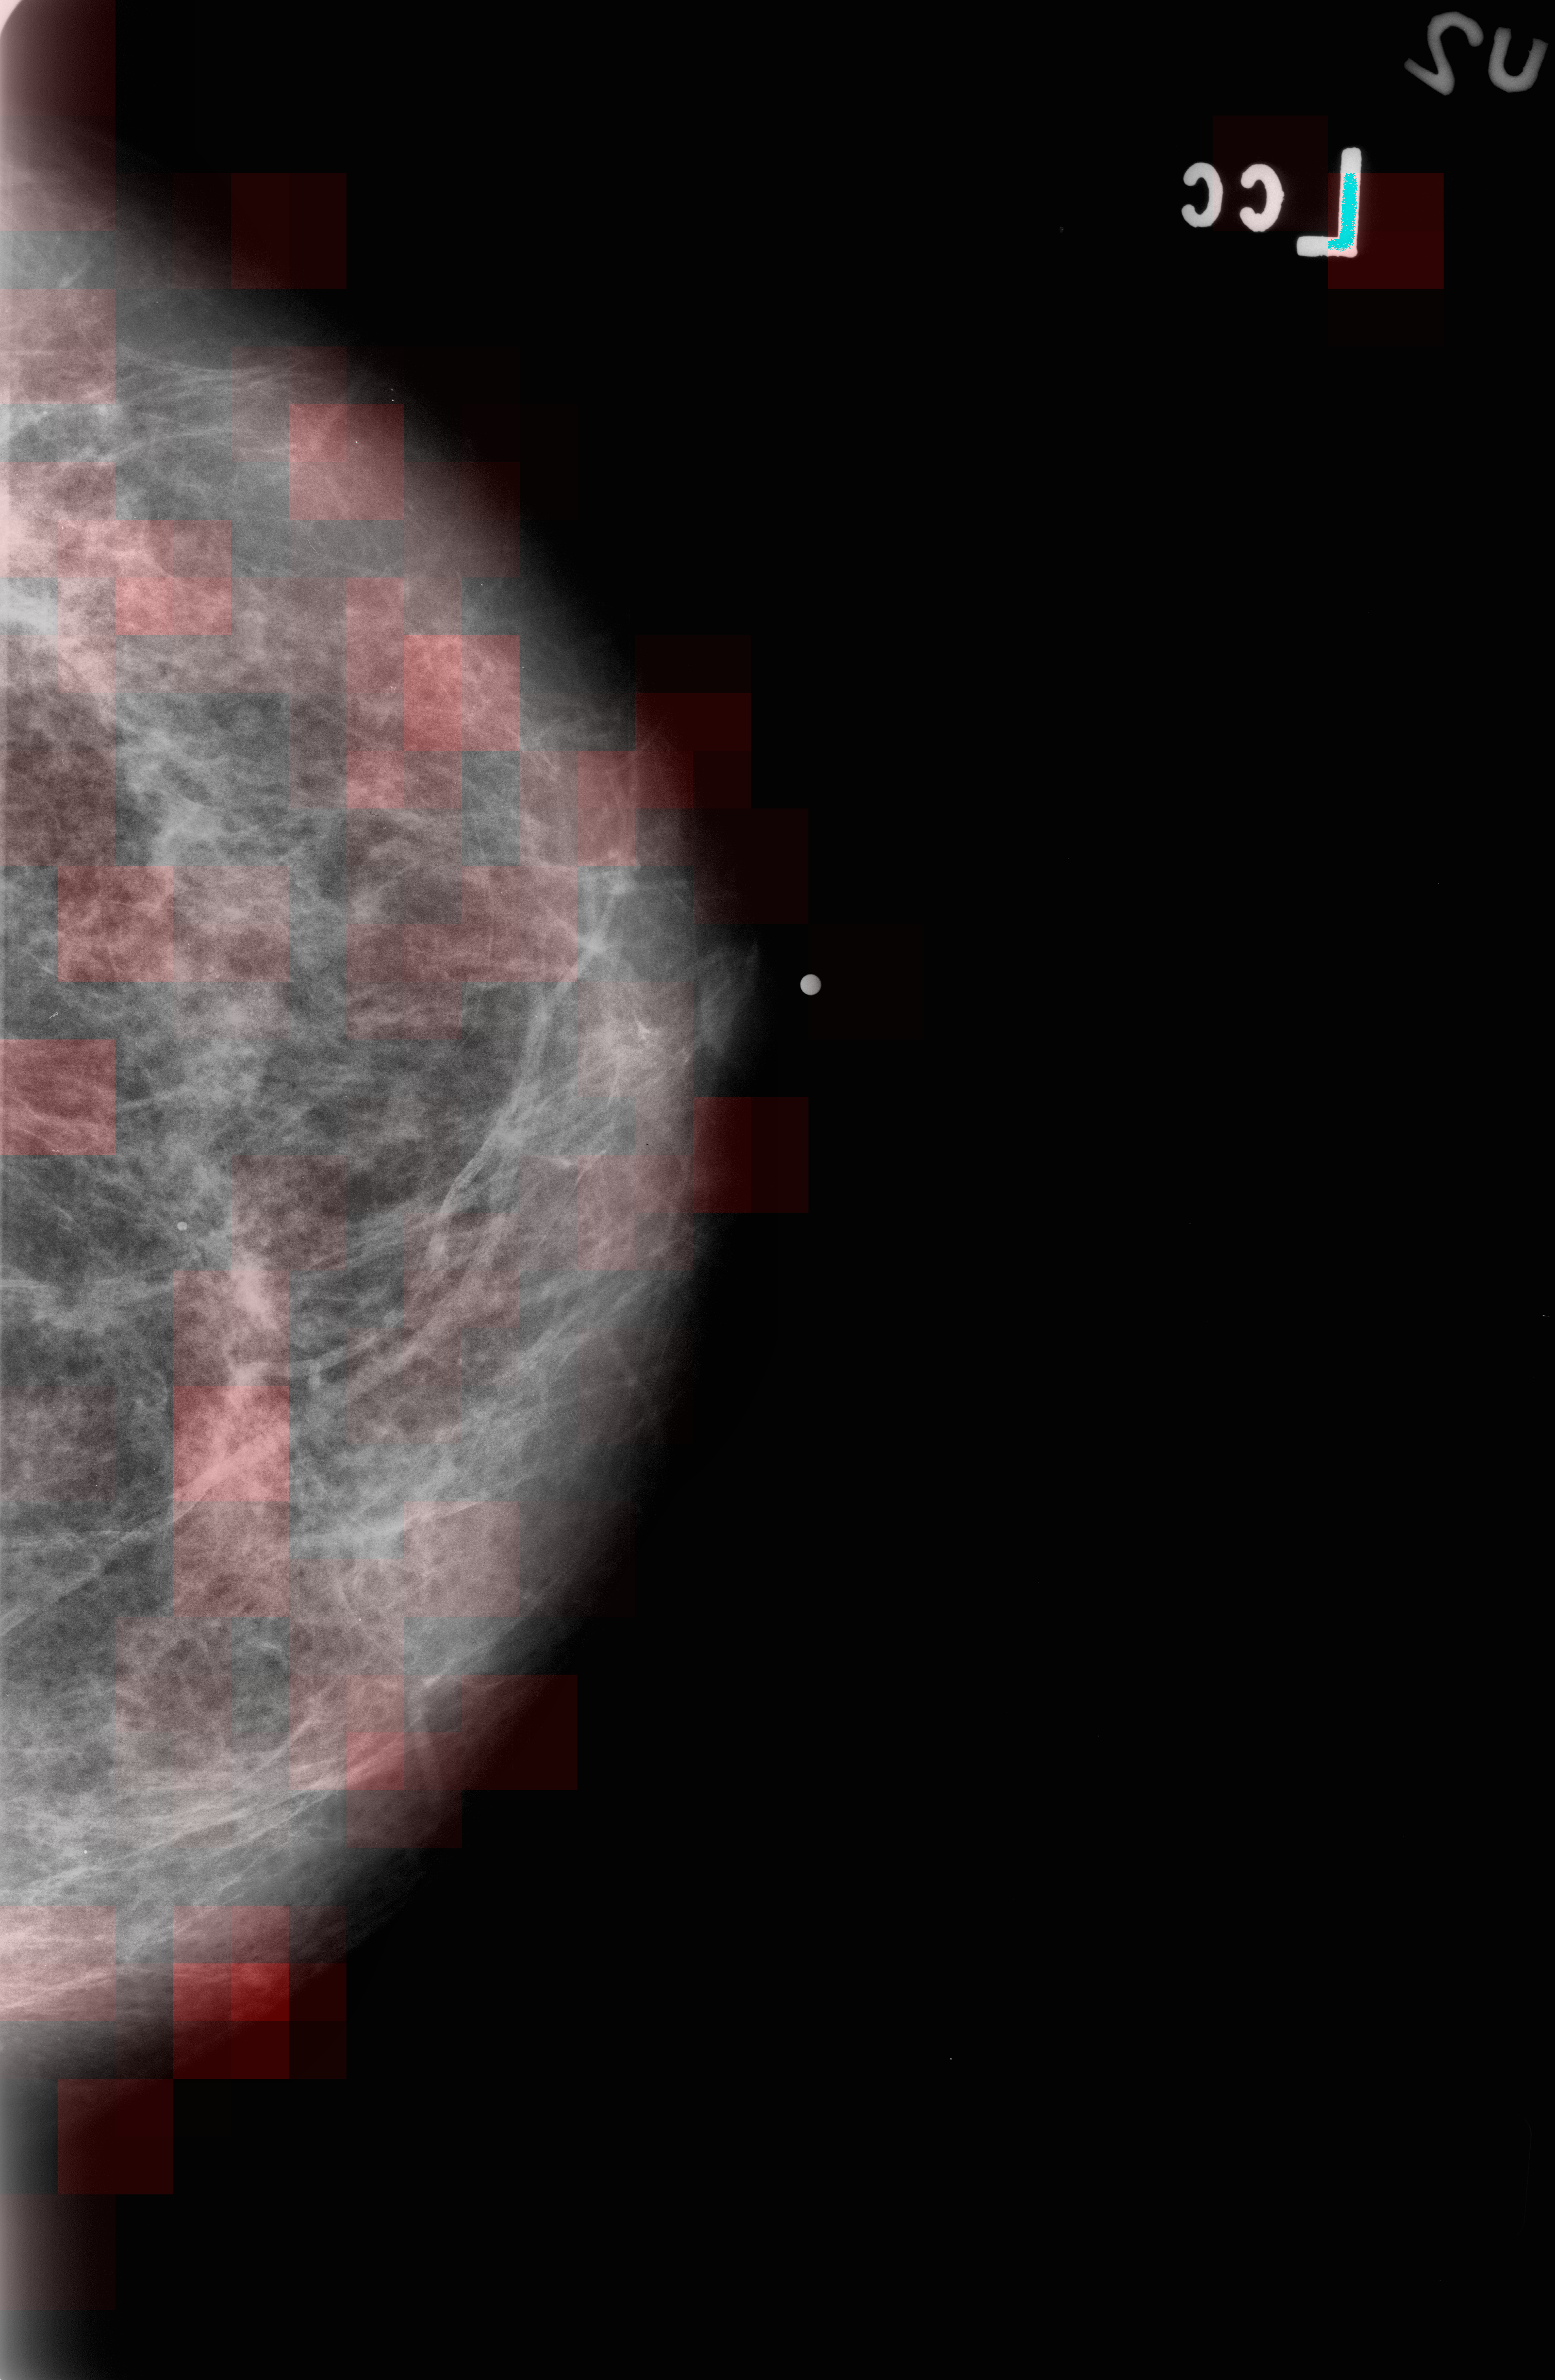

In [32]:
def save_img(test, img_dir, image, im, box, pic):
    region = im.crop(box)
    if np.average(np.array(region.getdata())) > 4:
        region.save('{}_{}_{}_{}.png'.format(test+image[:-4], str(pic).zfill(5), str(int(box[0])).zfill(5), str(int(box[1])).zfill(5)))

def predict_image(image):
    if image.endswith('.dcm'):
        if not os.path.isfile(image[:-4]+'.png'):
            mritopng.convert_file(image, image[:-4]+'.png')
            print('converted dcm to png')
        image = image[:-4]+'.png'

    elif not image.endswith('.jpg') and not image.endswith('.png'):
        print('image must be .dcm, .png, or .jpg format')
    
    cv_img = cv2.imread(image,0)
    print('loaded image')
    
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    img_clahe = clahe.apply(cv_img)
    cv2.imwrite(image[:-4]+'_clahe.png',img_clahe)
    
    print('applied CLAHE to image')
    
    img_dir = image[:-4]+'/'
    test = img_dir+'test/'
    
    if os.path.isdir(img_dir):
        shutil.rmtree(img_dir)
    
    os.mkdir(img_dir)
    os.mkdir(test)
    
    print('directory structure made')
    
    im = Image.open(image[:-4]+'_clahe.png')
    
    slice_size=224
    offset=.5
    width, height = im.size
    pic = 1 
    window_slide = slice_size * (1 - offset)
    
    for i in np.arange(0, width - slice_size, window_slide):
        for j in np.arange(0, height - slice_size, window_slide):
            box = (i, j, i + slice_size, j + slice_size)
            save_img(test, img_dir, image, im, box, pic)
            pic += 1
        box = (i, height - slice_size, i + slice_size, height)
        save_img(test, img_dir, image, im, box, pic)
        pic += 1
    box = (width - slice_size, height - slice_size, width, height)
    save_img(test, img_dir,image, im, box, pic)
    pic += 1
    
    print('images cut up')
    
    with CustomObjectScope({'relu6': relu6,'DepthwiseConv2D': DepthwiseConv2D}):
        model = load_model('1_epoch.h5')
        
    print('model loaded')

    test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(img_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=10,
                                                                            class_mode=None)
    
    pred = model.predict_generator(test_generator,verbose=1)
    
    print('made predictions')
    
    predictions = np.fmax(np.zeros(pred.shape),((pred-.5)*2)-.2)[:,0]
    
    imgs = sorted(os.listdir(img_dir+'test'))
    
    base = Image.open(image[:-4]+'_clahe.png')
    
    rgb = np.array(base.convert('RGB').getdata()).reshape(base.size[1],base.size[0],3)
    predictions = (predictions*100).astype(np.int8)
    
    for i,img in enumerate(imgs):
        y = int(img[-9:-4])
        x = int(img[-15:-10])

        rgb[y:y+slice_size,x:x+slice_size,0]+=predictions[i]

    final = Image.fromarray(np.uint8(rgb))
    print('final image made')
    
    final.save(image[:-4]+'_final.png')
    
    return final, np.max(pred[:,0]*100)
final, prob = predict_image("Calc-Test_P_00038_LEFT_CC.dcm")
final

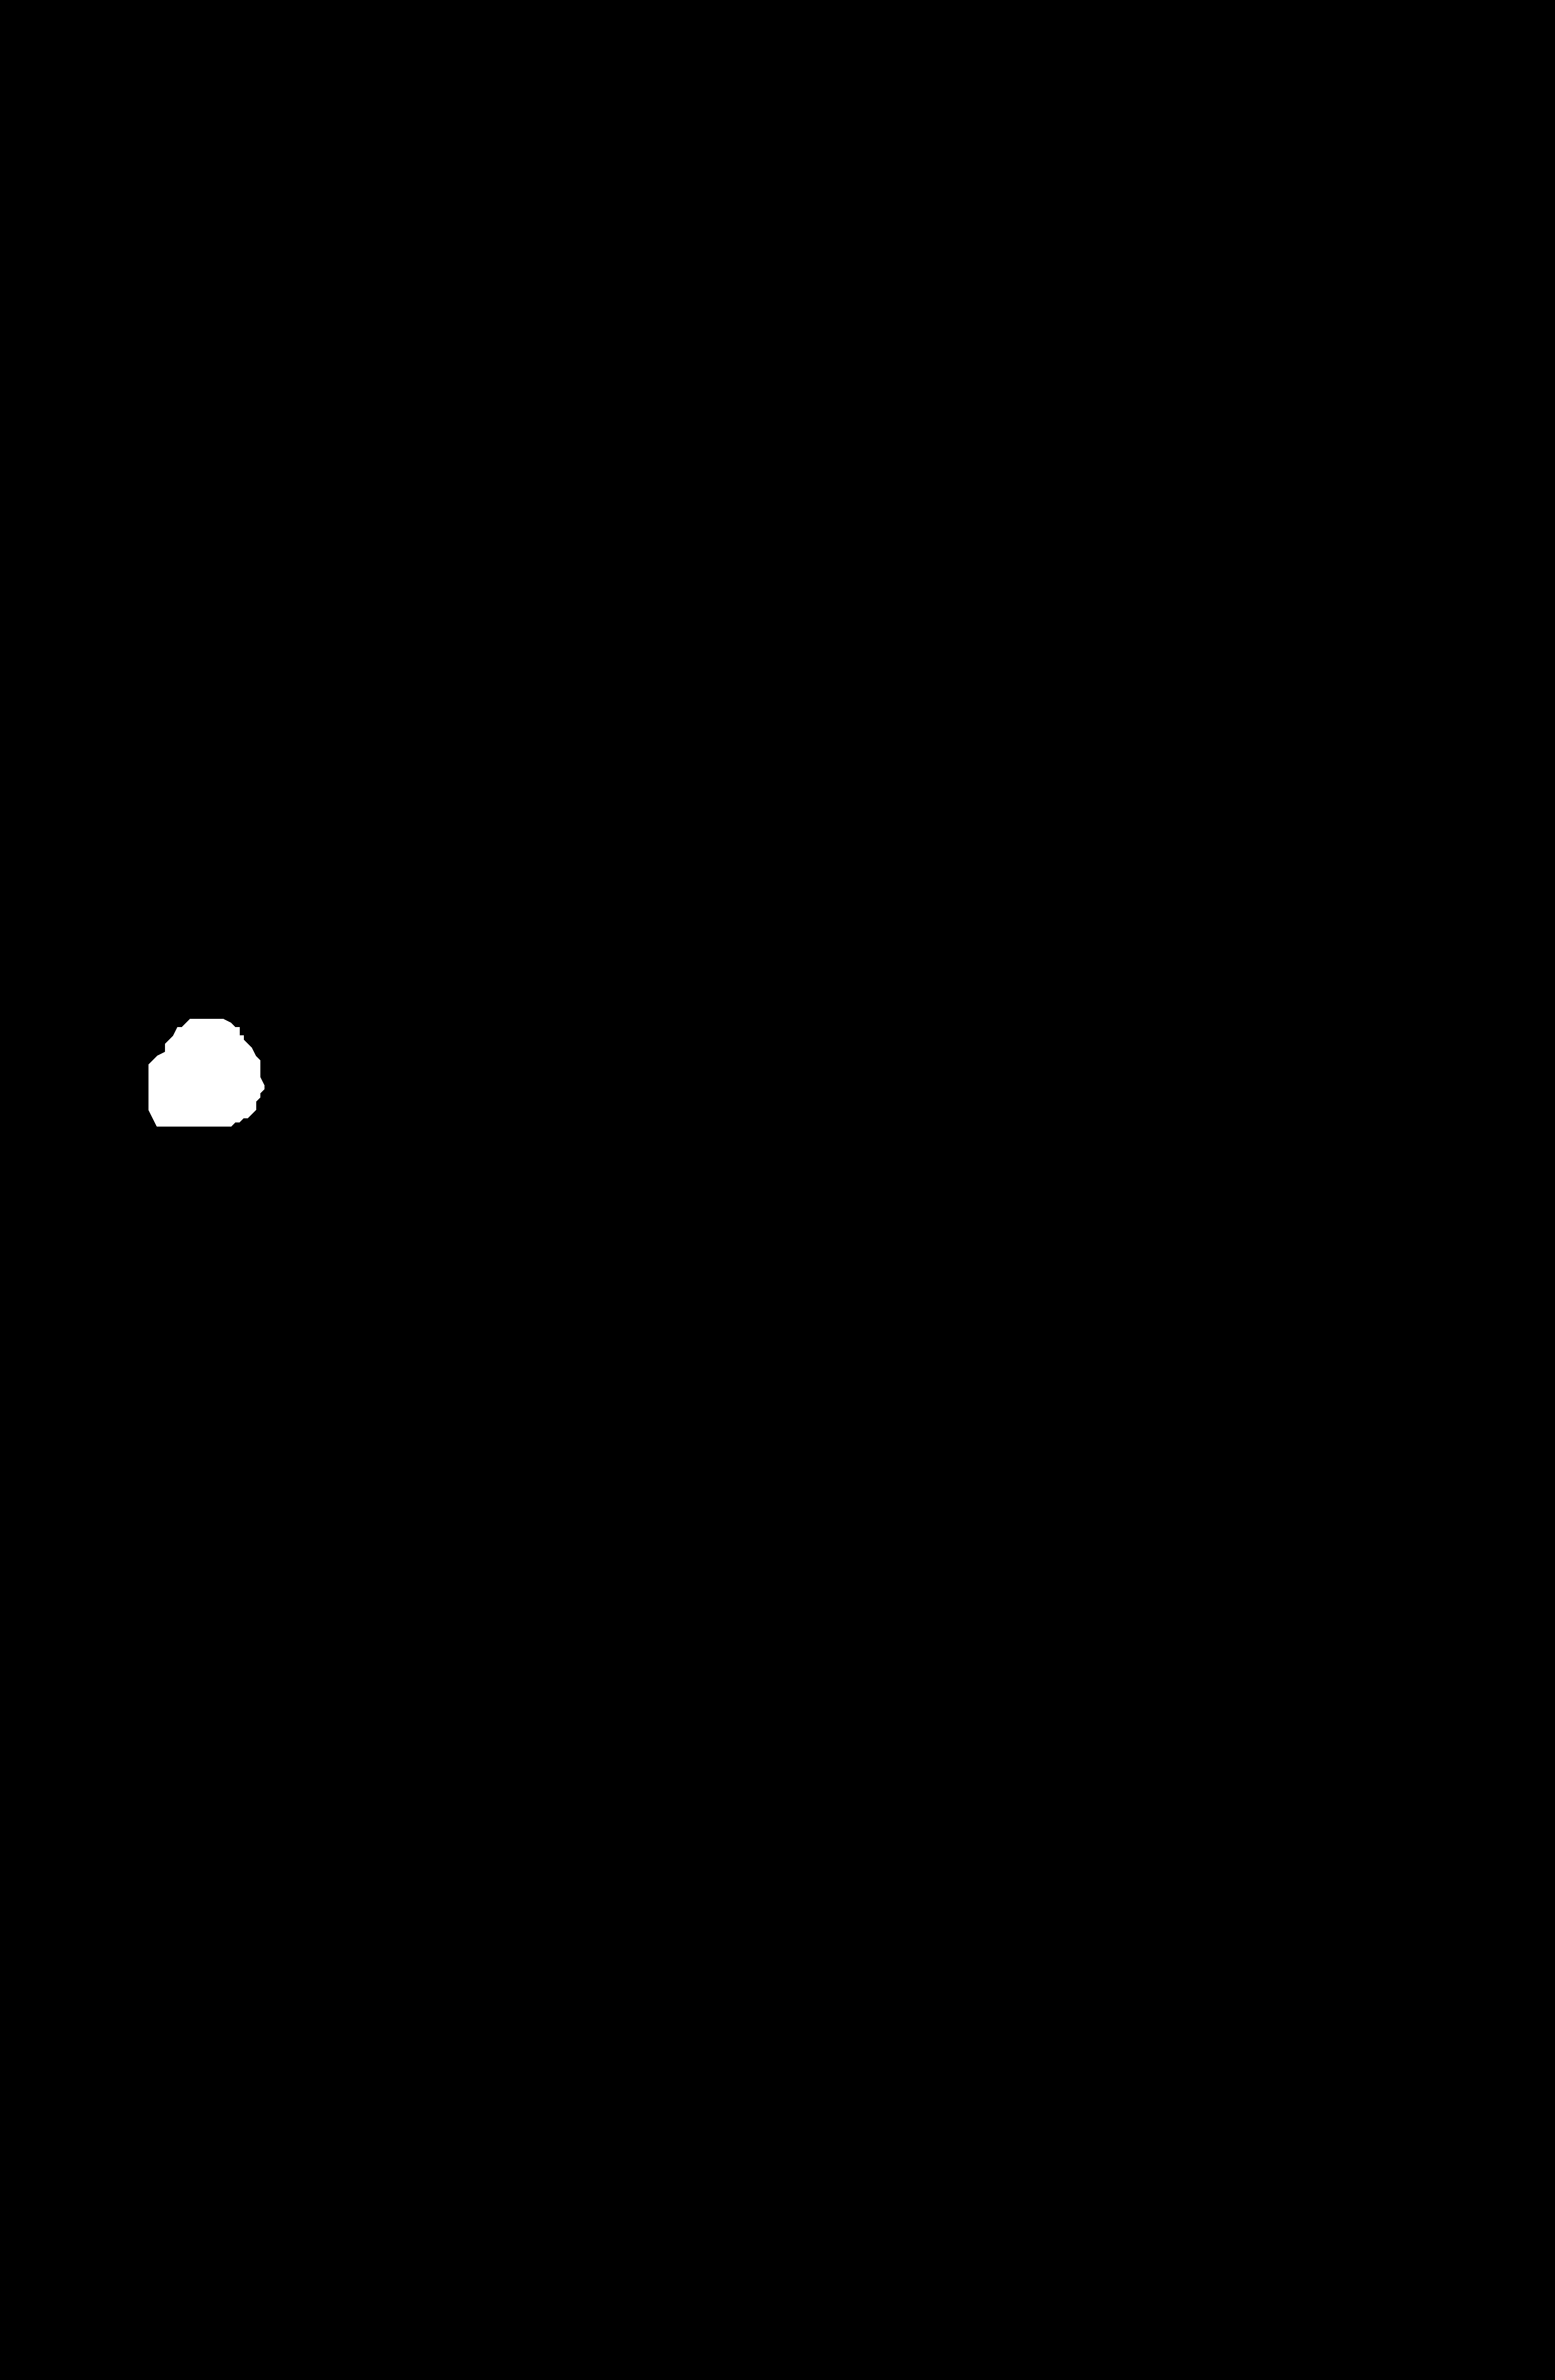

In [38]:
im = Image.open("Calc-Test_P_00038_LEFT_CC_1.png")
im

In [ ]:
Image.open()

In [ ]:
with CustomObjectScope({'relu6': relu6,'DepthwiseConv2D': DepthwiseConv2D}):
    model = load_model('1_epoch.h5')

In [34]:

endpoint = 'https://s3-api.us-geo.objectstorage.softlayer.net'

cos = boto3.client('s3', endpoint_url=endpoint)
res = boto3.resource('s3', endpoint_url=endpoint)

In [ ]:
# imgs = [x.key for x in res.Bucket('ddsm').objects.all() if '.dcm' in x.key]


In [ ]:
im = Image.open("Calc-Test_P_00038_LEFT_CC.png")

In [ ]:
im.save('Calc-Test_P_00038_LEFT_CC.jpg')

In [ ]:
img_0 = 'Calc-Test_P_00038_LEFT_CC.dcm'

In [35]:
res.Bucket('ddsm-png').download_file("Calc-Test_P_00038_LEFT_CC_1.png", "Calc-Test_P_00038_LEFT_CC_1.png")

In [ ]:
png = img_0[:-4]+'.png'

In [ ]:

mritopng.convert_file(img_0, png)

In [ ]:
import cv2
from PIL import Image

In [ ]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

cv_img = cv2.imread(png,0)
img_clahe = clahe.apply(cv_img)
cv2.imwrite(img_0[:-4]+'_clahe.png',img_clahe)
# img = cv2.cvtColor(img_clahe, cv2.COLOR_BGR2RGB)
# im_pil = Image.fromarray(img)


In [ ]:
im = Image.open(png)

In [ ]:
img_dir = img_0[:-4]+'/'

In [ ]:
os.mkdir(img_dir)

In [ ]:
# os.mkdir(img_dir+'test')
# os.mkdir(img_dir+'test/test')
os.mkdir(img_dir+'test/')

In [ ]:
im = Image.open(img_0[:-4]+'_clahe.png')

In [ ]:
slice_size=224
offset=.5
width, height = im.size
pic = 1 
window_slide = slice_size * (1 - offset)

In [ ]:
def save_img(im, box, pic):
    region = im.crop(box)
    if np.average(np.array(region.getdata())) > 4:
        region.save('{}_{}_{}_{}.png'.format(img_dir+'test/'+img_dir[:-1], str(pic).zfill(5), str(int(box[0])).zfill(5), str(int(box[1])).zfill(5)))


In [ ]:
for i in np.arange(0, width - slice_size, window_slide):
    for j in np.arange(0, height - slice_size, window_slide):
        box = (i, j, i + slice_size, j + slice_size)
        save_img(im, box, pic)
        pic += 1
    box = (i, height - slice_size, i + slice_size, height)
    save_img(im, box, pic)
    pic += 1
box = (width - slice_size, height - slice_size, width, height)
save_img(im, box, pic)
pic += 1

In [ ]:
imgs = os.listdir(img_dir+'test')

In [ ]:
len(imgs)

In [ ]:
data = []
for img in imgs:
    image = Image.open(img_dir+img)
    data.append(np.array(image.getdata()).reshape(224, 224).astype(np.uint8))
    image.close()

dataset = np.stack(data, axis=0)

In [ ]:
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(img_dir,
                                                                        target_size=(224, 224),
                                                                        batch_size=10,
                                                                        class_mode=None)

In [ ]:
pred = model.predict_generator(test_generator,verbose=1)

In [ ]:
predictions = np.fmax(np.zeros(pred.shape),((pred-.5)*2)-.4)[:,0]

In [ ]:
imgs = sorted(os.listdir(img_dir+'test'))

In [ ]:
rgb = np.array(clahe.convert('RGB').getdata()).reshape(clahe.size[1],clahe.size[0],3)
predictions = (predictions*100).astype(np.int8)

In [ ]:
for i,img in enumerate(imgs):
    y = int(img[-9:-4])
    x = int(img[-15:-10])
    
    rgb[y:y+slice_size,x:x+slice_size,0]+=predictions[i]

Image.fromarray(np.uint8(rgb))    
    

In [ ]:
rgb.dtype

In [ ]:
predictions.astype(np.int8)

In [ ]:
y = int(imgs[7][-9:-4])

In [ ]:
x = int(imgs[7][-15:-10])

In [ ]:
y

In [ ]:
x

In [ ]:
type(clahe)

In [ ]:
rgb = np.array(clahe.convert('RGB').getdata()).reshape(clahe.size[1],clahe.size[0],3)

In [ ]:
rgb.shape

In [ ]:
rgb[y:y+slice_size,x:x+slice_size,0]+=100*predictions[7]

In [ ]:
rgb[0:224,0:224,0]

In [ ]:
Image.fromarray(np.uint8(rgb))

In [ ]:
224*224

In [ ]:
os.remove(img_file)
for mask in masks:
    os.remove(mask)
im.close()

In [ ]:
import PIL
print PIL.__version__

In [ ]:
def process_image(img_file, exceptions_dir, slice_size=224, offset=.5):
    os.mkdir(img_file[:-4])
    im = Image.open(img_file)


    width, height = im.size
    pic = 1 
    window_slide = slice_size * (1 - offset)

    for i in np.arange(0, width - slice_size, window_slide):
        for j in np.arange(0, height - slice_size, window_slide):
            box = (i, j, i + slice_size, j + slice_size)
            save_img(im, map_img, box, positive_threshold, pic)
            pic += 1
        box = (i, height - slice_size, i + slice_size, height)
        save_img(im, map_img, box, positive_threshold, pic)
        pic += 1
    box = (width - slice_size, height - slice_size, width, height)
    save_img(im, map_img, box, positive_threshold, pic)
    pic += 1

    os.remove(img_file)
    for mask in masks:
        os.remove(mask)
    im.close()

In [ ]:
def predict_image(model, image):
    